<a href="https://colab.research.google.com/github/suhanasuffer/ArrayToArrayList/blob/main/NLP_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suhani Thakur

22070126115

AIML B2

In [ ]:
!pip install nltk spacy scikit-learn seaborn
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
import nltk
import spacy
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Loading training and testing datasets

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/NLP/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/NLP/test.csv")

In [ ]:
train_df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
test_df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [ ]:
train_df.shape

(120000, 3)

In [ ]:
test_df.shape

(7600, 3)

Preprocessing

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')
# Text Preprocessing function
def preprocess_text(text):
  # Convert to lowercase
  text = text.lower()
  # Remove URLs
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  # Remove punctuation and symbols
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  # Tokenization and Lemmatization with NLTK
  tokens = word_tokenize(text)
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]
  # Use SpaCy for additional lemmatization
  tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
  return ' '.join(tokens)
# Apply preprocessing to the 'Description' column for both train and test datasets
train_df['cleaned_text'] = train_df['Description'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['Description'].apply(preprocess_text)

In [ ]:
# Extract features and labels using the 'Class Index' column, using 'Class Index' as the target variable
X_train = train_df['cleaned_text']
y_train = train_df['Class Index']
X_test = test_df['cleaned_text']
y_test = test_df['Class Index']

In [ ]:
# Vectorization
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Function to display classification report and confusion matrix
def evaluate_model(model, X_test, y_test, model_name):
   y_pred = model.predict(X_test)
   # Classification Report
   print(f'Classification Report for {model_name}:')
   print(classification_report(y_test, y_pred))
   # Confusion Matrix
   cm = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(8,6))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
   plt.title(f'Confusion Matrix for {model_name}')
   plt.ylabel('Actual Class')
   plt.xlabel('Predicted Class')
   plt.show()

Logistic Regression

Classification Report for Logistic Regression with CountVectorizer:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90      1900
           2       0.95      0.96      0.96      1900
           3       0.87      0.87      0.87      1900
           4       0.87      0.89      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



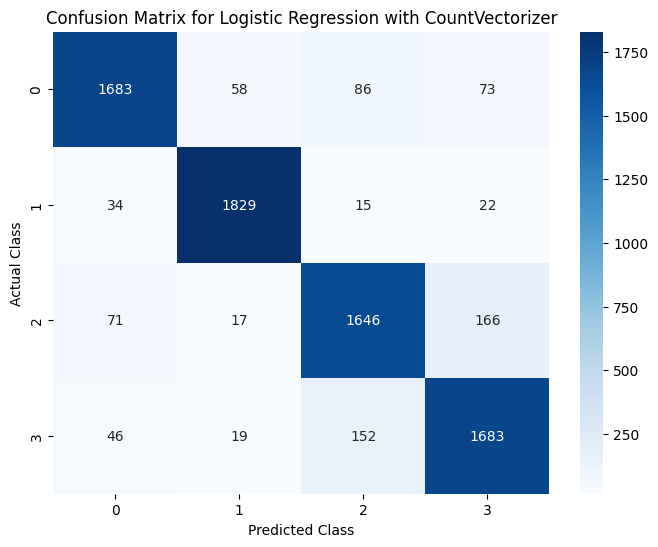

Classification Report for Logistic Regression with TFIDFVectorizer:
              precision    recall  f1-score   support

           1       0.93      0.89      0.91      1900
           2       0.94      0.97      0.96      1900
           3       0.88      0.87      0.88      1900
           4       0.88      0.89      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



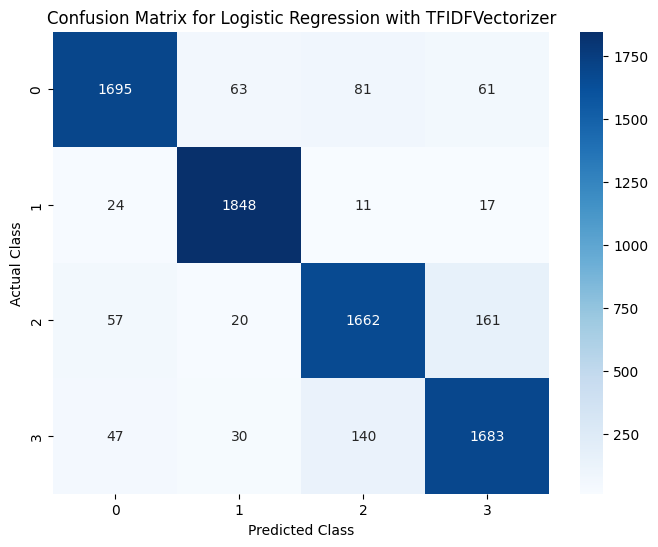

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cv, y_train)
evaluate_model(log_reg, X_test_cv, y_test, 'Logistic Regression with CountVectorizer')
log_reg.fit(X_train_tfidf, y_train)
evaluate_model(log_reg, X_test_tfidf, y_test, 'Logistic Regression with TFIDFVectorizer')

Support Vector Classifier

Classification Report for SVC with CountVectorizer:
              precision    recall  f1-score   support

           1       0.88      0.89      0.88      1900
           2       0.94      0.95      0.95      1900
           3       0.86      0.84      0.85      1900
           4       0.86      0.86      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



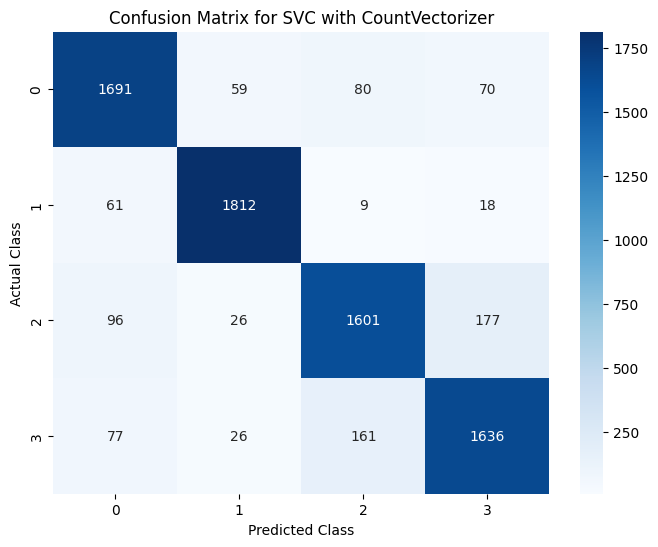

Classification Report for SVC with TFIDFVectorizer:
              precision    recall  f1-score   support

           1       0.93      0.89      0.91      1900
           2       0.95      0.98      0.96      1900
           3       0.88      0.88      0.88      1900
           4       0.88      0.89      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



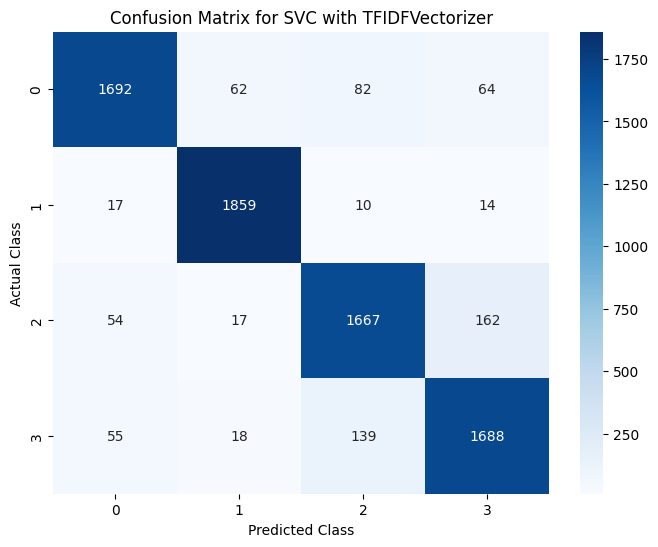

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train_cv, y_train)
evaluate_model(svc, X_test_cv, y_test, 'SVC with CountVectorizer')
svc.fit(X_train_tfidf, y_train)
evaluate_model(svc, X_test_tfidf, y_test, 'SVC with TFIDFVectorizer')

Random Forest Classifier

Classification Report for Random Forest with CountVectorizer:
              precision    recall  f1-score   support

           1       0.91      0.89      0.90      1900
           2       0.92      0.97      0.94      1900
           3       0.87      0.84      0.86      1900
           4       0.86      0.86      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



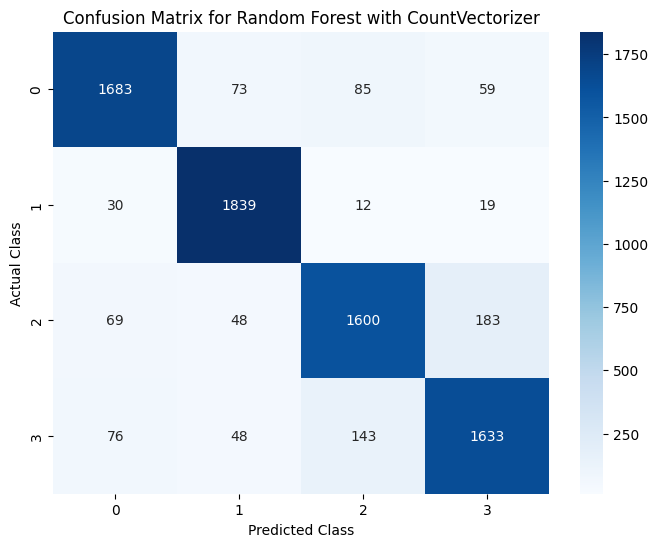

Classification Report for Random Forest with TFIDFVectorizer:
              precision    recall  f1-score   support

           1       0.91      0.89      0.90      1900
           2       0.92      0.97      0.94      1900
           3       0.86      0.84      0.85      1900
           4       0.86      0.85      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



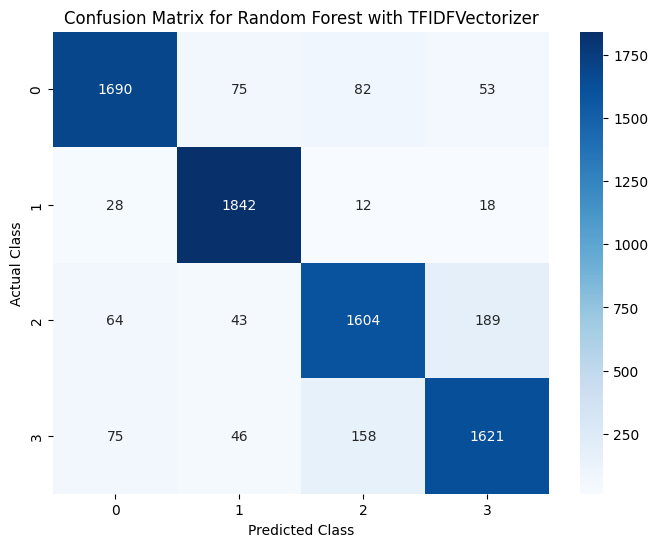

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_cv, y_train)
evaluate_model(rf, X_test_cv, y_test, 'Random Forest with CountVectorizer')
rf.fit(X_train_tfidf, y_train)
evaluate_model(rf, X_test_tfidf, y_test, 'Random Forest with TFIDFVectorizer')

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/NLP_Assignment1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NLP_Assignment1.ipynb to PDF
[NbConvertApp] Support files will be in NLP_Assignment1_files/
[NbConvertApp] Making directory ./NLP_Assignment1_files
[NbConvertApp] Making directory ./NLP_Assignment1_files
[NbConvertApp] Making directory ./NLP_Assignment1_files
[NbConvertApp] Making directory ./NLP_Assignment1_files
[NbConvertApp] Making directory ./NLP_Assignment1_files
[NbConvertApp] Making directory ./NLP_Assignment1_files
[NbConvertApp] Writing 94465 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 244375 bytes to /content/drive/MyDrive/Colab Notebooks/NLP_Assignment1.pdf
